## Objective:
- The objective from this project is to create a <b>Logistic Regression Classifier</b> to predict the <b>Stroke Condition</b>.
- <b>Stoke</b> is a condition in which either the blood flow to the brain stops or blood flow is excessive.


### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

### Create a spark session and import the required libraries

In [1]:
pip install pyspark

In [2]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import count
from pyspark.sql.functions import *

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("First Project").getOrCreate()

### Create a data schema programatically

In [4]:
from pyspark.sql.types import StructField, StructType , LongType, StringType  , IntegerType , DoubleType


dfSchema = StructType(
    [
		StructField("id", 				IntegerType()  , ) ,
		StructField("gender", 			StringType()   , ) ,
		StructField("age", 				DoubleType()   , ) ,
		StructField("hypertension", 	IntegerType()  , ) ,
		StructField("heart_disease", 	IntegerType()  , ) ,
		StructField("ever_married", 	StringType()   , ) ,
		StructField("work_type", 		StringType()   , ) ,
		StructField("Residence_type", 	StringType()   , ) ,
		StructField("avg_glucose_level",DoubleType()   , ) ,
		StructField("bmi", 				DoubleType()   , ) ,
		StructField("smoking_status", 	StringType()   , ) ,
		StructField("stroke", 			IntegerType()  , nullable=False) ,
     ])

In [5]:
train = spark.read.csv('/content/healthcare-dataset-stroke-data.csv', header=True, schema=dfSchema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

**Print the Schema**

In [6]:
train.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



**Show the first 10 rows from the data.**

In [7]:
train.show(10)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

**Explore null values and show how many null values in each column**

In [8]:
import  pyspark.sql.functions as F
null_columns = []
for col_name in train.columns:
    null_values = train.where(F.col(col_name).isNull()).count()
    if(null_values > 0):
        null_columns.append((col_name, null_values))
print(null_columns)

[('bmi', 201)]


In [9]:
spark.createDataFrame(null_columns, ['column', 'missing_value']).show()

+------+-------------+
|column|missing_value|
+------+-------------+
|   bmi|          201|
+------+-------------+



**Plot a count plot for the target label and notice the graph.**

In [10]:
train.groupby('stroke').count().toPandas()

,stroke,count
0,1,249
1,0,4861


5110


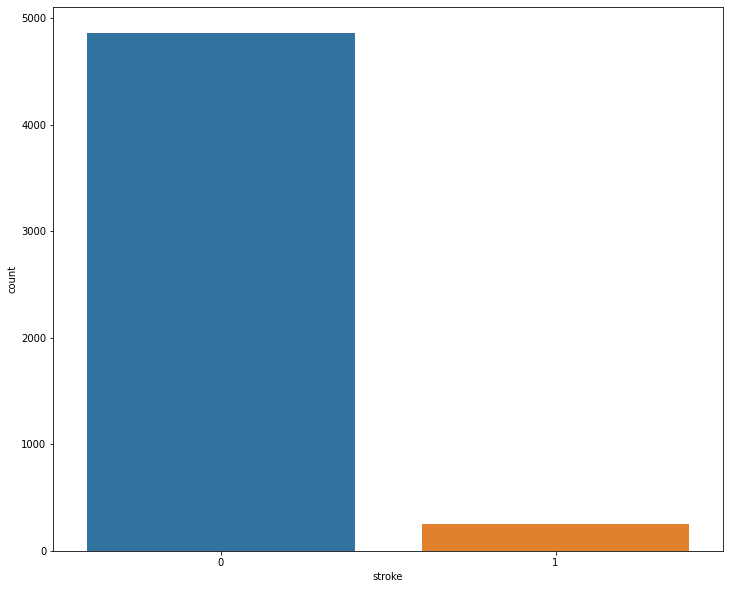

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_pd = train.toPandas()
print(len(df_pd))
plt.figure(figsize=(12,10))
sns.countplot(x='stroke', data=df_pd, order=df_pd['stroke'].value_counts().index)

we can see here unbalance data for storke column so here we can take care about spliting data to make sure for every data split we have the same ratio of each class so i see we can use stratify method 

**dditional EDA I find it useful**

In [12]:
train_count = train.count()
print(train_count)

5110


In [13]:
train.describe().show()

+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|summary|               id|gender|               age|      hypertension|      heart_disease|ever_married|work_type|Residence_type| avg_glucose_level|               bmi|smoking_status|             stroke|
+-------+-----------------+------+------------------+------------------+-------------------+------------+---------+--------------+------------------+------------------+--------------+-------------------+
|  count|             5110|  5110|              5110|              5110|               5110|        5110|     5110|          5110|              5110|              4909|          5110|               5110|
|   mean|36517.82935420744|  null|43.226614481409015|0.0974559686888454|0.05401174168297456|        null|     null|          null|106.14767710371804|28.893236911794673|          null| 

In [15]:
ever_married_grouped_df=train.groupBy("ever_married").count()
ever_married_grouped_df.show()

+------------+-----+
|ever_married|count|
+------------+-----+
|          No| 1757|
|         Yes| 3353|
+------------+-----+



In [16]:
work_type_grouped_df=train.groupBy("work_type").count()
work_type_grouped_df.show()


+-------------+-----+
|    work_type|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2925|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+



### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [34]:
train.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    max|              82.0|
+-------+------------------+



In [67]:
train_new = train.where(F.col('age')>=2)
train_new.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              4990|
|   mean| 44.23907815631262|
| stddev|21.908077881917443|
|    min|               2.0|
|    max|              82.0|
+-------+------------------+



### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [68]:
train_new.select('gender','smoking_status').show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [69]:
train_new.select("gender").distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [70]:
train_new.select("smoking_status").distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [71]:
from pyspark.sql.functions import when
train_new = train_new.withColumn("gender", when(train_new.gender == "Male",1) \
      .when(train_new.gender == "Female",0).otherwise(0))
train_new.select("gender").distinct().show()

+------+
|gender|
+------+
|     1|
|     0|
+------+



In [72]:
train_new = train_new.withColumn("smoking_status", when(train_new.smoking_status == "smokes",1) \
      .when(train_new.smoking_status == "formerly smoked",0.75).when(train_new.smoking_status == "Unknown",0.5).otherwise(0))

In [73]:
train_new.select("smoking_status").distinct().show()

+--------------+
|smoking_status|
+--------------+
|           0.0|
|           1.0|
|           0.5|
|          0.75|
+--------------+



#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [76]:
train_new.select('gender','smoking_status').show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [74]:
train_new.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = false)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [79]:
train_new.describe('bmi').show()

+-------+------------------+
|summary|               bmi|
+-------+------------------+
|  count|              4795|
|   mean|29.140855057351413|
| stddev| 7.765248721877016|
|    min|              11.3|
|    max|              97.6|
+-------+------------------+



we can see here the mean of bmi column is 29 so we can fill null values with the mean 

In [85]:

dff = train_new.fillna(29, subset=['bmi'])

we can check for null values 



In [86]:
import  pyspark.sql.functions as F
nul_columns = []
for col_name in dff.columns:
    null_values = dff.where(F.col(col_name).isNull()).count()
    if(null_values > 0):
        nul_columns.append((col_name, null_values))
print(nul_columns)

[]


now we don't have any null values

## New Section

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [158]:
X_train, X_test = dff.randomSplit([0.8, 0.2],seed = 42)

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [159]:
from pyspark.ml.feature import StringIndexer, VectorAssembler,OneHotEncoder
from pyspark.ml import Pipeline

In [160]:
categoricalCols = [field for (field, dataType) in dff.dtypes
                   if dataType == "string"]
categoricalCols
            

['ever_married', 'work_type', 'Residence_type']

In [161]:

numericCols = [field for (field,dataType) in dff.dtypes
              if ((dataType=='double' or dataType == 'int')& (field!='stoke'))]
numericCols.remove('id')
numericCols


['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [162]:
indexOutputCols = [x + "_Index" for x in categoricalCols]
indexOutputCols
oheOutputCols = [x + "_OHE" for x in categoricalCols]
oheOutputCols

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [163]:
stringIndexer = StringIndexer(inputCols=categoricalCols,
                             outputCols=indexOutputCols,
                             handleInvalid='skip')
oheEncoder = OneHotEncoder(inputCols=indexOutputCols,
                          outputCols=oheOutputCols)

In [164]:
assemblerInputs = oheOutputCols + numericCols
assemblerInputs.remove('stroke')
assemblerInputs


['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [165]:
vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [166]:
from pyspark.ml.classification import LogisticRegression
LR = LogisticRegression(featuresCol = 'features', labelCol = 'stroke')
pipeline = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,LR])

prediction = pipeline.fit(X_train)



### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [167]:

predictions = pipeline.fit(X_train).transform(X_test)

predictions.select("prediction", "stroke", "features").show()

+----------+------+--------------------+
|prediction|stroke|            features|
+----------+------+--------------------+
|       0.0|     0|(13,[0,1,5,6,7,10...|
|       0.0|     0|(13,[1,5,7,10,11]...|
|       0.0|     0|(13,[0,1,7,10,11]...|
|       0.0|     0|(13,[0,1,7,10,11,...|
|       0.0|     0|(13,[0,1,5,6,7,10...|
|       0.0|     0|(13,[0,1,7,10,11]...|
|       0.0|     0|(13,[0,2,6,7,8,10...|
|       0.0|     1|(13,[0,2,5,7,10,1...|
|       0.0|     0|(13,[4,7,10,11,12...|
|       0.0|     0|(13,[0,1,6,7,10,1...|
|       0.0|     0|(13,[0,3,6,7,10,1...|
|       0.0|     1|(13,[1,7,8,9,10,1...|
|       0.0|     0|(13,[1,6,7,10,11]...|
|       0.0|     0|(13,[0,2,7,10,11,...|
|       0.0|     0|(13,[0,1,7,8,10,1...|
|       0.0|     0|(13,[0,3,5,7,10,1...|
|       0.0|     0|(13,[1,5,7,10,11]...|
|       0.0|     0|[1.0,1.0,0.0,0.0,...|
|       0.0|     0|[1.0,0.0,0.0,1.0,...|
|       0.0|     0|(13,[1,5,7,10,11]...|
+----------+------+--------------------+
only showing top

In [168]:
predictions.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = false)
 |-- smoking_status: double (nullable = false)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [169]:
predictions.select("prediction", "stroke").where(col('stroke')==1).show()

+----------+------+
|prediction|stroke|
+----------+------+
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
|       0.0|     1|
+----------+------+
only showing top 20 rows



In [170]:
predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|  953|
+----------+-----+



### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [171]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [172]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [173]:
evaluatorROC.evaluate(predictions)

0.5

### Improve Model Performance
- We noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter We must have a <b>weightCol</b> in our training dataframe.
- In order to create this column We will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### ROC SHOULD be   > 0.65
<BR>


In [187]:
stroke_0=X_train.select('stroke').where(col('stroke')==0).count()
stroke_1=X_train.select('stroke').where(col('stroke')==1).count()
total=X_train.select('stroke').count()
prob_stroke_1=stroke_1/total
prob_stroke_0=stroke_0/total
print("Probability of stroke==0: {} ,Probability of stroke==1: {}".format(prob_stroke_0,prob_stroke_1))
def weightedcol(x):
    if x==0:
        return 1-prob_stroke_0
    else:
        return 1-prob_stroke_1
convertUDF = udf(lambda z: weightedcol(z),DoubleType())



Probability of stroke==0: 0.9499628436958137 ,Probability of stroke==1: 0.05003715630418628


In [188]:
new_train = X_train.select(F.col("*"),convertUDF(F.col("stroke")).alias("weightCol") )

new_train.show(truncate=False)

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+-------------------+
|id |gender|age |hypertension|heart_disease|ever_married|work_type    |Residence_type|avg_glucose_level|bmi |smoking_status|stroke|weightCol          |
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+-------------------+
|67 |0     |17.0|0           |0            |No          |Private      |Urban         |92.97            |29.0|0.75          |0     |0.05003715630418626|
|77 |0     |13.0|0           |0            |No          |children     |Rural         |85.81            |18.6|0.5           |0     |0.05003715630418626|
|91 |0     |42.0|0           |0            |No          |Private      |Urban         |98.53            |18.5|0.0           |0     |0.05003715630418626|
|99 |0     |31.0|0           |0            |No          |Private      |Urban         |10

In [193]:
from pyspark.ml.classification import LogisticRegression
LR_new = LogisticRegression(featuresCol = 'features', labelCol = 'stroke',weightCol='weightCol')
pipeline_new = Pipeline(stages=[stringIndexer,oheEncoder,vecAssembler,LR_new])


predictions_new = pipeline_new.fit(new_train)
p=predictions_new.transform(X_test)

# predictions_new.select("prediction", "stroke", "features").show()

In [194]:
evaluatorROC.evaluate(p)

0.7757777671252577